# Hate Speech Detector - Models Summary & Tests

In [1]:
import csv
import pickle
import os
import glob

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

## Models summary

In [2]:
file_names = glob.glob('results/*/short_results.csv')
file_names

['results/pl_svm/short_results.csv',
 'results/pl_dense/short_results.csv',
 'results/en_dense/short_results.csv',
 'results/en_conv/short_results.csv',
 'results/pl_conv/short_results.csv',
 'results/pl_lstm/short_results.csv',
 'results/en_svm/short_results.csv',
 'results/en_lstm/short_results.csv']

In [3]:
order = [6, 2, 3, 7, 0, 1, 4, 5]
file_names = [file_names[i] for i in order]
file_names

['results/en_svm/short_results.csv',
 'results/en_dense/short_results.csv',
 'results/en_conv/short_results.csv',
 'results/en_lstm/short_results.csv',
 'results/pl_svm/short_results.csv',
 'results/pl_dense/short_results.csv',
 'results/pl_conv/short_results.csv',
 'results/pl_lstm/short_results.csv']

In [4]:
summary_data = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    summary_data.append({'acc': np.mean(df['Accuracy']),
                         'f1s0': np.mean(df['F1 score (0)']),
                         'f1s1': np.mean(df['F1 score (1)'])})
summary_df = pd.DataFrame(summary_data)
summary_df

,acc,f1s0,f1s1
0,0.908003,0.776324,0.942093
1,0.946873,0.839549,0.968160
2,0.954338,0.868450,0.972373
3,0.956288,0.871496,0.973665
4,0.925747,0.955175,0.783831
5,0.930803,0.960266,0.731857
6,0.973941,0.984802,0.908618
7,0.980883,0.988793,0.935016


In [5]:
labels = ['SVM', 'Dense NN', 'Conv. NN', 'LSTM NN']

In [6]:
def models_comparison_bars(df, labels, title, save_file=None):
    
    def set_bar_labels(axis, bars):
        for bar in bars:
            h = bar.get_height()
            w = bar.get_width()
            x_c = bar.get_x()
            axis.annotate('{}'.format(round(h, 2)), xy=(x_c + w/2, h), xytext=(0, -20),
                          textcoords='offset points', size=15, ha='center', va='bottom')
    
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    
    x = range(len(labels))
    acc = df['acc'].values
    f1s0 = df['f1s0'].values
    f1s1 = df['f1s1'].values
    
    max_acc_id = np.argmax(acc)
    max_f1s0_id = np.argmax(f1s0)
    max_f1s1_id = np.argmax(f1s1)
    
    bars0 = axs[0].bar(x, acc, color='r')
    axs[0].set_xlabel('Model')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Accuracy')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].set_ylim([0, 1])
    set_bar_labels(axs[0], bars0)
    axs[0].patches[max_acc_id].set_facecolor('g')
    
    bars1 = axs[1].bar(x, f1s0, color='b')
    axs[1].set_xlabel('Model')
    axs[1].set_ylabel('F1 score (no hate)')
    axs[1].set_title('F1 score (no hate)')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].set_ylim([0, 1])
    set_bar_labels(axs[1], bars1)
    axs[1].patches[max_f1s0_id].set_facecolor('g')
    
    bars2 = axs[2].bar(x, f1s1, color='m')
    axs[2].set_xlabel('Model')
    axs[2].set_ylabel('F1 score (hate speech)')
    axs[2].set_title('F1 score (hate speech)')
    axs[2].set_xticks(x)
    axs[2].set_xticklabels(labels)
    axs[2].set_ylim([0, 1])
    set_bar_labels(axs[2], bars2)
    axs[2].patches[max_f1s1_id].set_facecolor('g')
    
    fig.suptitle(title)
    
    if save_file:
        plt.savefig(save_file)
    plt.show()

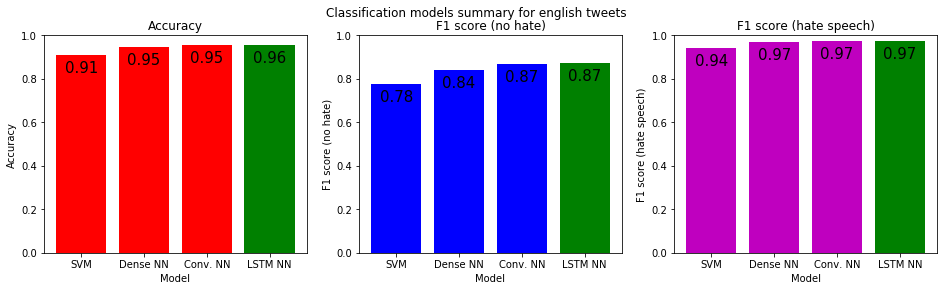

In [7]:
models_comparison_bars(summary_df.iloc[0:4], labels=labels,
                       title='Classification models summary for english tweets',
                       save_file='results/summary_en.png')

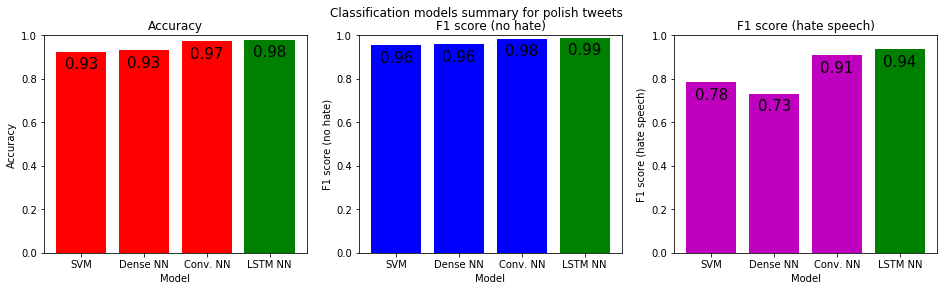

In [8]:
models_comparison_bars(summary_df.iloc[4:8], labels=labels,
                       title='Classification models summary for polish tweets',
                       save_file='results/summary_pl.png')

*The best classifier for english and polish tweets is LSTM Neural Network with 96% accuracy for EN and 98% for PL.*

## Tests summary

In [9]:
file_names_en = glob.glob('tests/en*/assigned_labels.csv')
order = [2, 0, 1, 3]
file_names_en = [file_names_en[i] for i in order]
file_names_en

['tests/en_svm/assigned_labels.csv',
 'tests/en_dense/assigned_labels.csv',
 'tests/en_conv/assigned_labels.csv',
 'tests/en_lstm/assigned_labels.csv']

In [10]:
file_names_pl = glob.glob('tests/pl*/assigned_labels.csv')
order = [0, 1, 2, 3]
file_names_pl = [file_names_pl[i] for i in order]
file_names_pl

['tests/pl_svm/assigned_labels.csv',
 'tests/pl_dense/assigned_labels.csv',
 'tests/pl_conv/assigned_labels.csv',
 'tests/pl_lstm/assigned_labels.csv']

In [11]:
def get_assignments_series(file_names):
    series = []
    for file_name in tqdm(file_names):
        with open(file_name, 'r') as f:
            reader = csv.reader(f)
            series.append([row[0] for row in list(reader)[1:]])
    
    return series

In [12]:
def class_distribution_hist(series, labels, cls, x_label, y_label, title, file_name=None):
    pd.Series(series).hist()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    tick_marks = np.arange(len(cls))
    plt.xticks(tick_marks, cls)
    plt.legend(labels=labels, loc='best')
    
    if file_name:
        plt.savefig(file_name)
    plt.show()

In [13]:
series_en = get_assignments_series(file_names_en)
series_pl = get_assignments_series(file_names_pl)

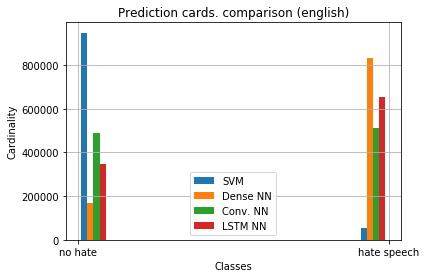

In [14]:
class_distribution_hist(series_en, labels=labels, cls=['no hate', 'hate speech'], x_label='Classes', y_label='Cardinality',
                        title='Prediction cards. comparison (english)', file_name='tests/pred_cards_comp_en.png')

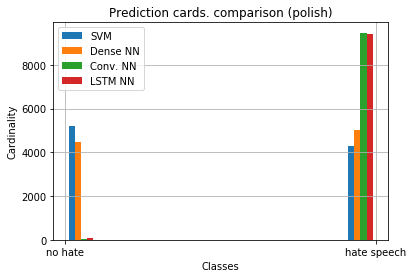

In [15]:
class_distribution_hist(series_pl, labels=labels, cls=['no hate', 'hate speech'], x_label='Classes', y_label='Cardinality',
                        title='Prediction cards. comparison (polish)', file_name='tests/pred_cards_comp_pl.png')

## Test cases examples

In [16]:
# save (once) tweet texts to visualize (input_true=None if does not contain true labels)
def save_vis_tweets(input_texts, input_preds, output_file, ind=(0, 20)):
    if not os.path.exists(output_file):
        with open(output_file, 'w') as f:
            writer = csv.writer(f)
            writer.writerow(['Text', 'Prediction', 'Explanation'])
            
            with open(input_texts, 'r') as f_texts:
                texts_reader = csv.reader(f_texts)
                next(texts_reader, None)
                texts = [t for t in texts_reader][ind[0]: ind[1]]
            with open(input_preds, 'r') as f_preds:
                preds_reader = csv.reader(f_preds)
                next(preds_reader, None)
                preds = [p for p in preds_reader][ind[0]: ind[1]]
            
            for t, p in zip(texts, preds):
                writer.writerow([t[0], p[0], ''])
                
        raise Exception('Stay awhile! Fill in the "Explanation" column in saved tweets to visualize.')

In [17]:
save_vis_tweets('tests/tweets_en.csv', 'tests/en_lstm/assigned_labels.csv', 'tests/tweets_vis_en.csv',
                ind=(40, 60))
save_vis_tweets('tests/tweets_pl.csv', 'tests/pl_lstm/assigned_labels.csv', 'tests/tweets_vis_pl.csv',
                ind=(655, 675))

In [18]:
def test_cases_board(test_cases, title, file_name=None):
    h = 20
    n = len(test_cases)
    fig, axis = plt.subplots(1, 1, figsize=(16., n*3.2))
    axis.axis('off')
    axis.set_xlim([0, 100])
    axis.set_ylim([0, n*h])
    axis.plot([0, 100], [0, 0], color='k')
    axis.plot([0, 0], [0, n*h], color='k')
    axis.plot([100, 100], [0, n*h], color='k')
    
    for i in range(n):
        axis.annotate('Tweet text:', xy=(4, 16 + i*h),
                      xycoords='data', size=15, fontweight='bold')
        text = u'{}'.format(test_cases[i]['Text'].decode('utf-8').replace('\n', ''))
        text = '\n'.join([text[j:j+len(text)/3] for j in range(0, len(text), len(text)/3)])
        axis.annotate(text, xy=(4, 7 + i*h), xycoords='data', size=15)
        
        axis.annotate('Prediction:', xy=(4, 4 + i*h),
                      xycoords='data', size=15, fontweight='bold')
        cls = 'no hate' if test_cases[i]['Prediction'] == '0' else 'hate speech'
        cls_color = 'b' if cls == 'no hate' else 'm'
        axis.annotate(cls, xy=(15, 4 + i*h), xycoords='data', size=15, color=cls_color)
        
        axis.annotate('Reason:', xy=(27, 4 + i*h),
                      xycoords='data', size=15, fontweight='bold')
        reason = u'{}'.format(test_cases[i]['Explanation'].decode('utf-8'))
        reason_color = 'g' if reason.startswith('Ok') else 'r'
        axis.annotate(reason, xy=(35, 4 + i*h), xycoords='data', size=15, color=reason_color)
        
        axis.plot([0, 100], [20 + i*h, 20 + i*h], color='k')
    
    
    plt.title(title)
    if file_name:
        plt.savefig(file_name)
    plt.show()

### Best classifier for EN tweets - LSTM Neural Network

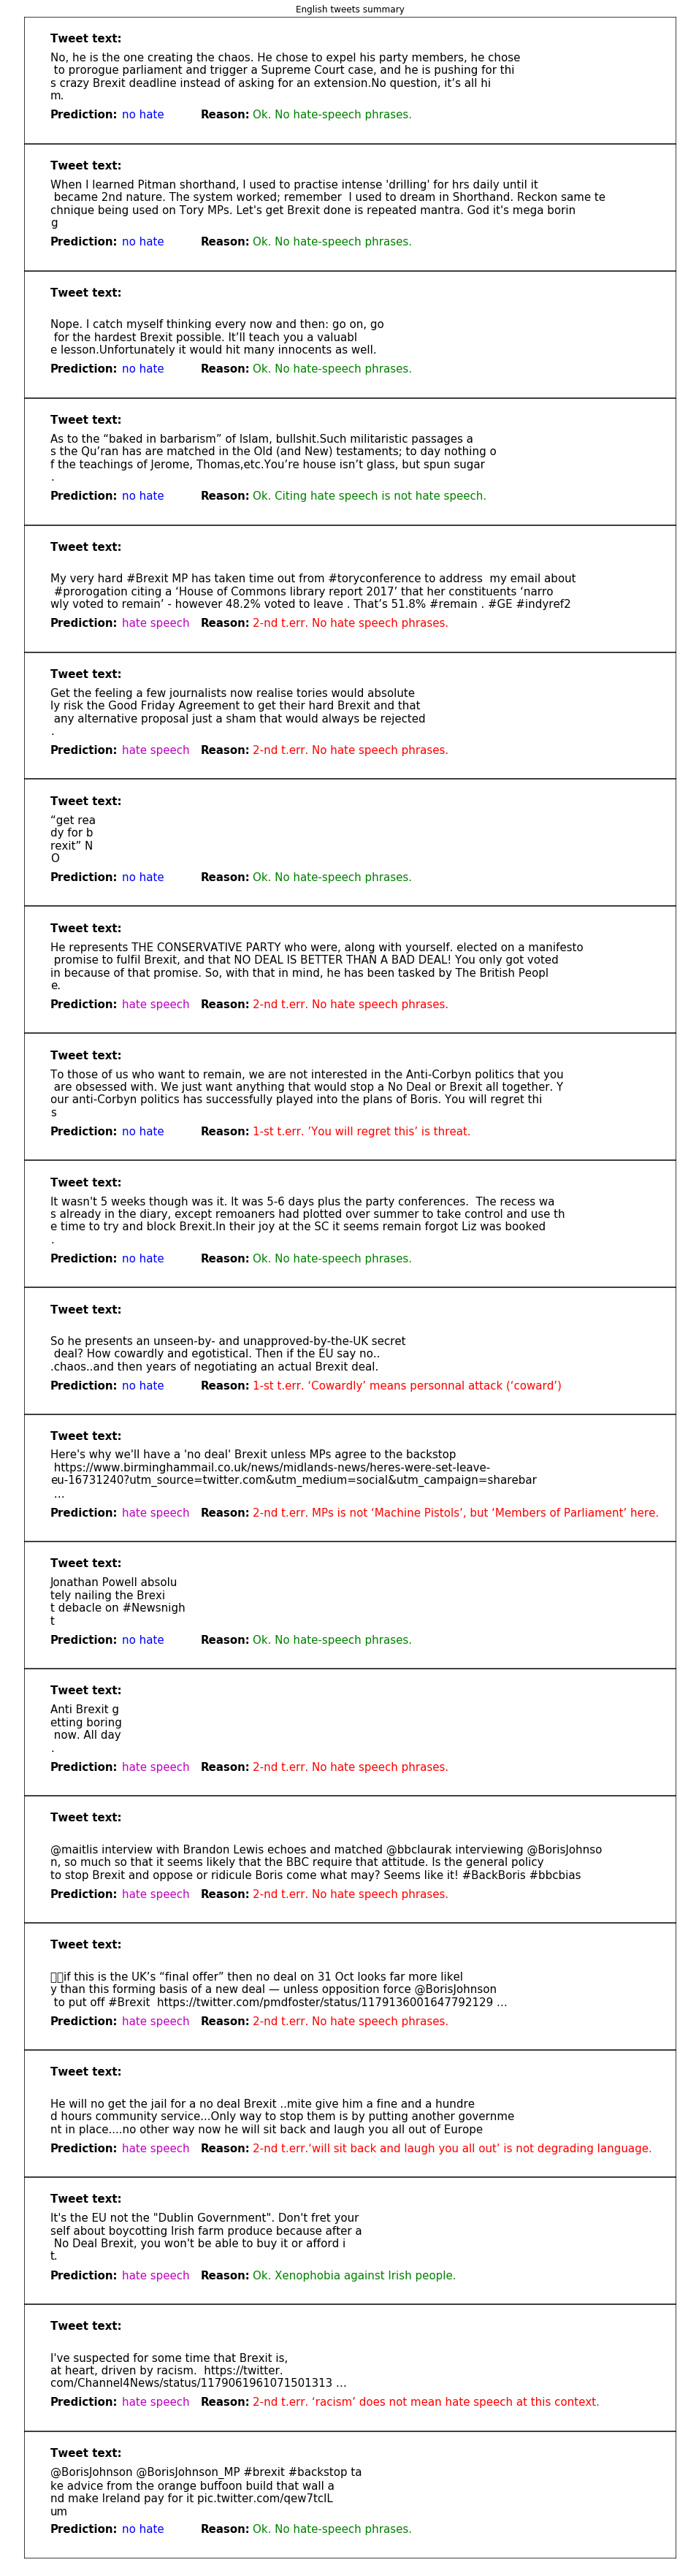

In [19]:
with open('tests/tweets_vis_en.csv', 'r') as f:
    reader = csv.DictReader(f)
    test_cases_en = list(reader)

test_cases_board(test_cases_en, title='English tweets summary', file_name='tests/tweets_summary_en.png')

### Best classifier for PL tweets - LSTM Neural Network

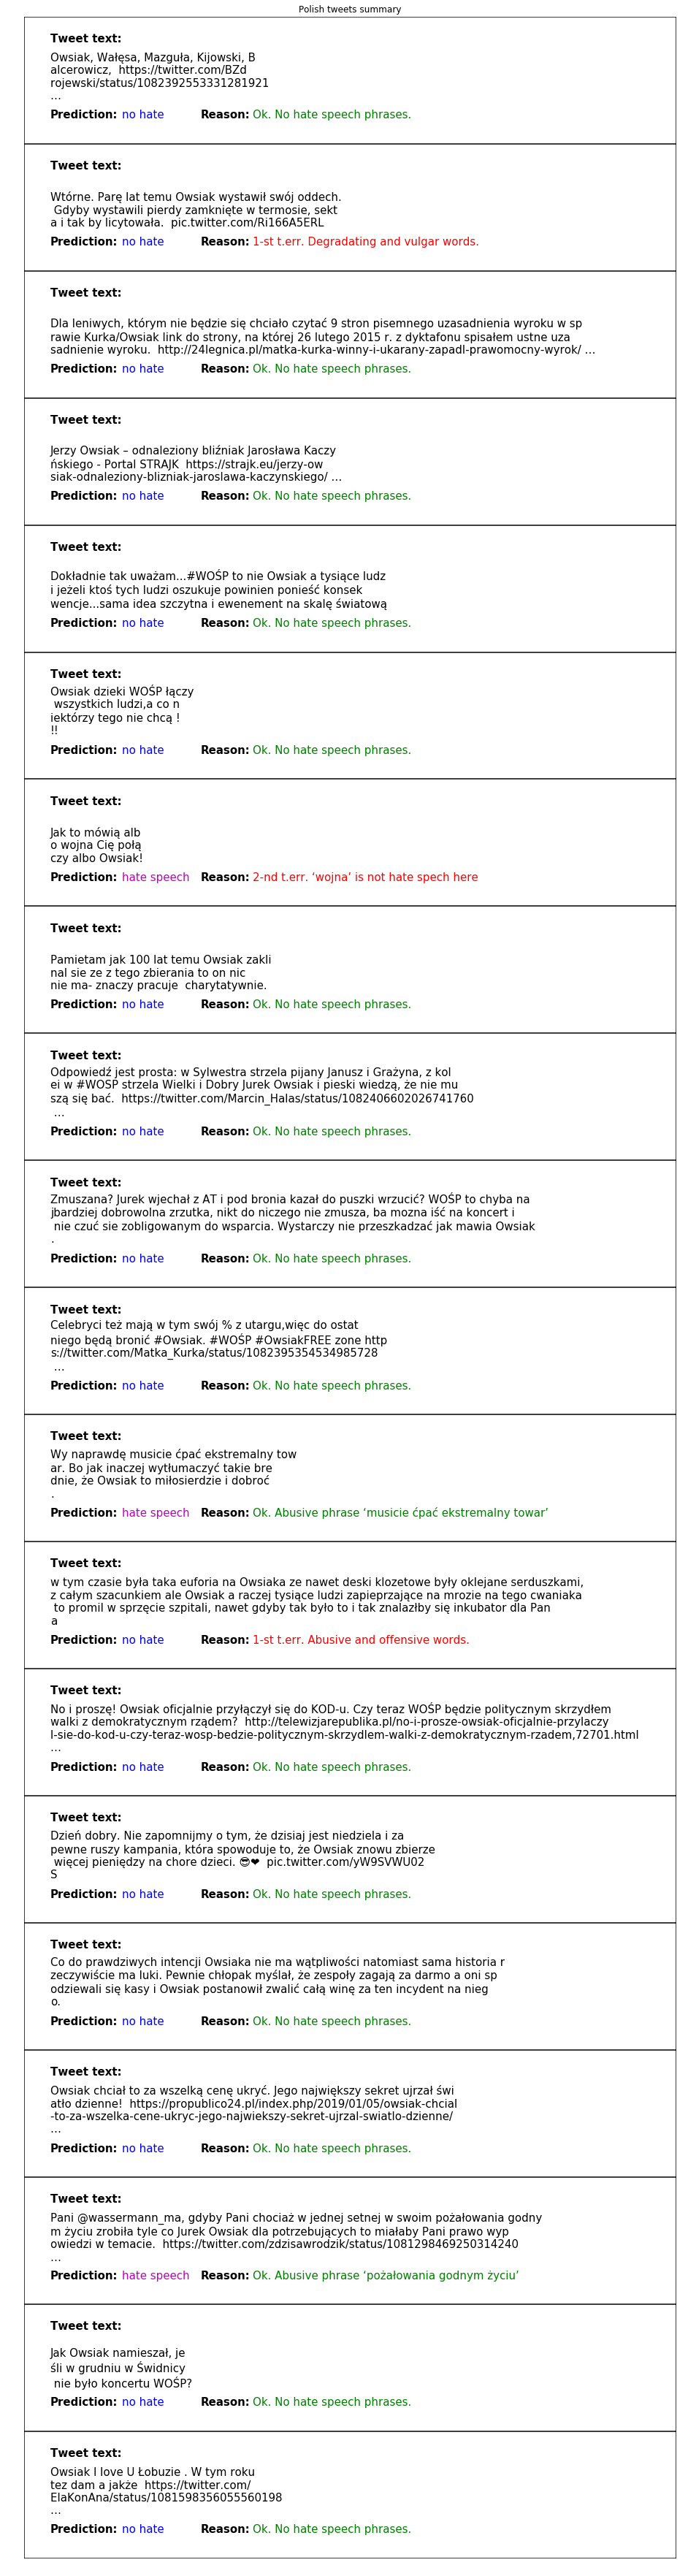

In [20]:
with open('tests/tweets_vis_pl.csv', 'r') as f:
    reader = csv.DictReader(f)
    test_cases_pl = list(reader)

test_cases_board(test_cases_pl, title='Polish tweets summary', file_name='tests/tweets_summary_pl.png')

## Data analyses

### Data analyses to perform:
    1) Which hashtags/mentions denote hate speech or no-hate speech?
    2) How the tweets denoted as hate speech are popular (number of likes retweets, replies)?
    3) Which users (username, name) from test data use hate speech (examples)?
    4) How do the hour/day-of-month histograms for all, hate-speech and non-hate-speech tweets look like?